# Binnings Technics

✅ Apa Itu Diskritisasi?

Diskritisasi (Discretization) adalah proses mengubah data numerik (kontinu) menjadi data kategori (diskrit).

Contoh:

| Nilai Asli (Numerik) | Kategori (Diskrit) |
| -------------------- | ------------------ |
| 3.2                  | Rendah             |
| 6.7                  | Sedang             |
| 8.9                  | Tinggi             |

Tujuan Diskritisasi

1. Meningkatkan performa model (terutama yang lebih baik menangani kategori seperti Naive Bayes Multinomial).

2. Menyederhanakan representasi data.

3. Mengurangi noise dari data numerik.

4. Membuat data lebih mudah dipahami manusia (interpretabilitas).


Kapan Diskritisasi Digunakan?

1. Saat data input bertipe kontinu (misalnya: suhu, panjang, berat, dll.).

2. Saat model atau metode hanya menerima fitur kategorik.

3. Saat ingin mengurangi kompleksitas data.

Metode Diskritisasi Umum
1. Equal Width Binning (Interval Sama Lebar)
Membagi rentang nilai menjadi beberapa interval dengan lebar yang sama.

Contoh: Nilai 0–10 dibagi jadi 5 bin → [0-2), [2-4), [4-6), [6-8), [8-10)

2. Equal Frequency Binning (Jumlah Data Sama)
Setiap bin memiliki jumlah data (frekuensi) yang kurang lebih sama.

Contoh: 100 data → dibagi 4 bin, masing-masing 25 data.

3. K-Means Clustering
Mengelompokkan nilai numerik ke dalam k cluster berdasarkan kemiripan, lalu memberi label kategorik berdasarkan cluster.

Contoh: KMeans(n_clusters=3) menghasilkan 3 grup, misalnya Low, Medium, High.

Kelebihan:

Lebih fleksibel. Bisa menangkap struktur alami data.

4. Entropi-Based / MDLP (Minimum Description Length Principle)
Diskritisasi dengan mempertimbangkan label (supervised). Biasanya digunakan dalam algoritma Decision Tree untuk menemukan titik potong terbaik.


# Implementasi dengan menggunakan data Iris

In [8]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


# Library yang digunakan

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pengumpulan Data

In [11]:
def get_pg_data():
    conn = psycopg2.connect(
        host="ndik-anugrahs15042004-79e6.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_7FsJrvmsNJPSkv0qE-1",
        database="defaultdb",
        port=18856
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mulyono-anugrahs15042004-79e6.d.aivencloud.com",
        user="avnadmin",
        password="AVNS_UrgkI5rl3s3AFs4zUkw",
        database="iris",
        port=18856
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          15.6         32.4          20.3         25.7
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa          24.2         13.4          33.2         24.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

# Data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4

In [12]:
# 1. Siapkan fitur (X) dan label (y)
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_cols].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.26342958 -0.26471231 -0.24581264 -0.24282931]
 [ 3.32879194  3.34500102  3.10617787  3.06847946]]
Akurasi (Adjusted Rand Score): 0.004

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.26849937 -0.27873375 -0.2602409  -0.25208248]
 [ 4.33793787  3.34114419  4.24447237  3.59532423]
 [ 2.19474628  3.10850515  2.09869743  2.40153738]]
Akurasi (Adjusted Rand Score): 0.004

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.26849937 -0.27873375 -0.2602409  -0.25208248]
 [ 4.26940771  3.44475947  4.30257957  2.90347049]
 [ 2.26153802  3.29654338  1.95240206  1.88965605]
 [ 3.20302716  2.45347939  3.49425659  5.91778228]]
Akurasi (Adjusted Rand Score): 0.004


# Klasifikasi Setelah Diskritisasi (KMeans Cluster sebagai Fitur)

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X = df_merged.drop("class", axis=1)
y = df_merged["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluasi
print("GaussianNB (sebelum diskritisasi):")
print(classification_report(y_test, y_pred_nb))

print("Decision Tree (sebelum diskritisasi):")
print(classification_report(y_test, y_pred_dt))


GaussianNB (sebelum diskritisasi):
                 precision    recall  f1-score   support

    Iris-setosa       0.95      1.00      0.97        19
Iris-versicolor       1.00      0.38      0.56        13
 Iris-virginica       0.65      1.00      0.79        13

       accuracy                           0.82        45
      macro avg       0.87      0.79      0.77        45
   weighted avg       0.88      0.82      0.80        45

Decision Tree (sebelum diskritisasi):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



# Pohon keputusan yang belum di deskritisasi

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

# === Data Buah Cucumis ===
data = {
    "Panjang Buah (cm)": [25, 28, 30, 27, 29, 20, 22, 21, 19, 23, 15, 14, 16, 15, 17],
    "Diameter Buah (cm)": [15, 16, 17, 14, 16, 5, 6, 5.5, 4.5, 6, 8, 7.5, 8.5, 8, 9],
    "Kelas": [
        "Cucumis melo", "Cucumis melo", "Cucumis melo", "Cucumis melo", "Cucumis melo",
        "Cucumis sativus", "Cucumis sativus", "Cucumis sativus", "Cucumis sativus", "Cucumis sativus",
        "Cucumis anguria", "Cucumis anguria", "Cucumis anguria", "Cucumis anguria", "Cucumis anguria"
    ]
}
df = pd.DataFrame(data)

# === Label Encoding ===
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Kelas'])  # anguria=0, melo=1, sativus=2 (urutan tergantung sklearn)

# === Fitur dan Target ===
X = df[["Panjang Buah (cm)", "Diameter Buah (cm)"]]
y = df["Label"]  # gunakan label numerik hasil encoding

# === Train Decision Tree ===
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X, y)

# === 1. Tampilkan Pohon Keputusan ===
print("\n=== Pohon Keputusan (Decision Tree) ===")
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


=== Pohon Keputusan (Decision Tree) ===
|--- Panjang Buah (cm) <= 18.00
|   |--- class: 0
|--- Panjang Buah (cm) >  18.00
|   |--- Diameter Buah (cm) <= 10.00
|   |   |--- class: 2
|   |--- Diameter Buah (cm) >  10.00
|   |   |--- class: 1



# Visualisasi Splitting


=== Prediksi 2 Data Baru ===
Data 1: Panjang=18, Diameter=6 → Prediksi: Cucumis anguria
Data 2: Panjang=26, Diameter=15 → Prediksi: Cucumis melo

=== Visualisasi Decision Boundary ===


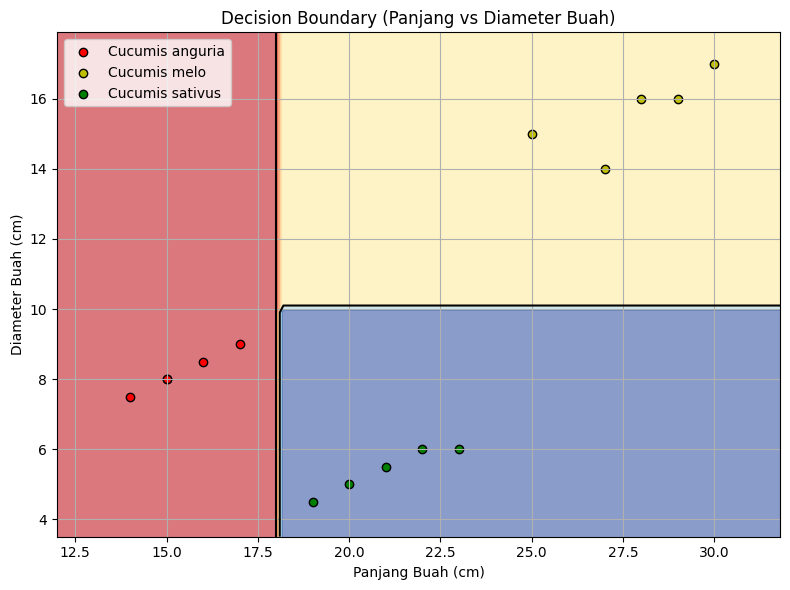

In [16]:
# === Uji 2 Data Baru ===
uji_baru = pd.DataFrame({
    'Panjang Buah (cm)': [18, 26],
    'Diameter Buah (cm)': [6, 15]
})

prediksi = clf.predict(uji_baru)
hasil = le.inverse_transform(prediksi)

print("\n=== Prediksi 2 Data Baru ===")
for i, (p, d) in enumerate(zip(uji_baru['Panjang Buah (cm)'], uji_baru['Diameter Buah (cm)'])):
    print(f"Data {i+1}: Panjang={p}, Diameter={d} → Prediksi: {hasil[i]}")

# === Visualisasi Decision Boundary dengan Garis Split ===
print("\n=== Visualisasi Decision Boundary ===")
plot_colors = ["r", "y", "g"]
plot_step = 0.2

x_min, x_max = X['Panjang Buah (cm)'].min() - 2, X['Panjang Buah (cm)'].max() + 2
y_min, y_max = X['Diameter Buah (cm)'].min() - 1, X['Diameter Buah (cm)'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=['Panjang Buah (cm)', 'Diameter Buah (cm)'])
Z = clf.predict(grid_df)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Area warna background untuk masing-masing kelas
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)

# Garis pemisah antar kelas (split boundary)
plt.contour(xx, yy, Z, levels=np.unique(Z), linewidths=1.5, colors='k')

# Plot titik data training
for label, color in zip(np.unique(y), plot_colors):
    idx = np.where(y == label)
    plt.scatter(X.iloc[idx]['Panjang Buah (cm)'], X.iloc[idx]['Diameter Buah (cm)'],
                c=color, edgecolor='k', label=le.inverse_transform([label])[0])

plt.xlabel("Panjang Buah (cm)")
plt.ylabel("Diameter Buah (cm)")
plt.title("Decision Boundary (Panjang vs Diameter Buah)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Pohon Keputusan (Setelah Diskritisasi dengan KMeans)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

# === Data Buah Cucumis ===
data = {
    "Panjang Buah (cm)": [25, 28, 30, 27, 29, 20, 22, 21, 19, 23, 15, 14, 16, 15, 17],
    "Diameter Buah (cm)": [15, 16, 17, 14, 16, 5, 6, 5.5, 4.5, 6, 8, 7.5, 8.5, 8, 9],
    "Kelas": [
        "Cucumis melo", "Cucumis melo", "Cucumis melo", "Cucumis melo", "Cucumis melo",
        "Cucumis sativus", "Cucumis sativus", "Cucumis sativus", "Cucumis sativus", "Cucumis sativus",
        "Cucumis anguria", "Cucumis anguria", "Cucumis anguria", "Cucumis anguria", "Cucumis anguria"
    ]
}
df = pd.DataFrame(data)

# === Label Encoding Kelas ===
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Kelas'])

# === Fitur Numerik ===
X_numeric = df[["Panjang Buah (cm)", "Diameter Buah (cm)"]]

# === Diskritisasi dengan KMeans ===
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_numeric)

# Tambahkan fitur diskrit
df["Cluster"] = cluster_labels

# === Model Decision Tree dengan Fitur Diskrit ===
X_diskrit = df[["Cluster"]]  # hanya fitur hasil diskritisasi
y = df["Label"]

clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_diskrit, y)

# === Tampilkan Pohon Keputusan ===
print("\n=== Pohon Keputusan (Setelah Diskritisasi dengan KMeans) ===")
tree_rules = export_text(clf, feature_names=["Cluster"])
print(tree_rules)



=== Pohon Keputusan (Setelah Diskritisasi dengan KMeans) ===
|--- Cluster <= 0.50
|   |--- class: 0
|--- Cluster >  0.50
|   |--- class: 1



# Visualisasi Splitting


=== Pohon Keputusan (Setelah Diskritisasi dengan KMeans) ===
|--- Cluster <= 0.50
|   |--- class: 0
|--- Cluster >  0.50
|   |--- class: 1



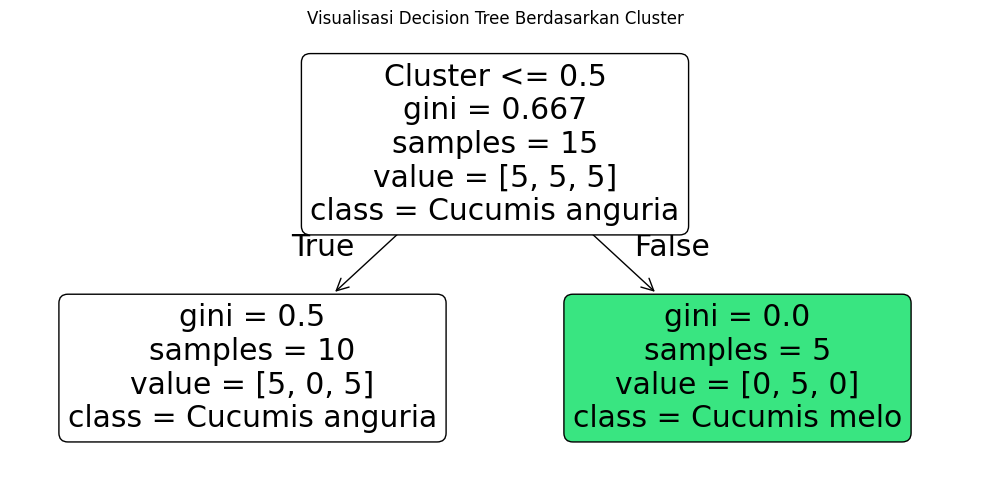

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

# === Data Buah Cucumis ===
data = {
    "Panjang Buah (cm)": [25, 28, 30, 27, 29, 20, 22, 21, 19, 23, 15, 14, 16, 15, 17],
    "Diameter Buah (cm)": [15, 16, 17, 14, 16, 5, 6, 5.5, 4.5, 6, 8, 7.5, 8.5, 8, 9],
    "Kelas": [
        "Cucumis melo", "Cucumis melo", "Cucumis melo", "Cucumis melo", "Cucumis melo",
        "Cucumis sativus", "Cucumis sativus", "Cucumis sativus", "Cucumis sativus", "Cucumis sativus",
        "Cucumis anguria", "Cucumis anguria", "Cucumis anguria", "Cucumis anguria", "Cucumis anguria"
    ]
}
df = pd.DataFrame(data)

# === Label Encoding Kelas ===
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Kelas'])

# === Fitur Numerik ===
X_numeric = df[["Panjang Buah (cm)", "Diameter Buah (cm)"]]

# === Diskritisasi dengan KMeans ===
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_numeric)

# Tambahkan fitur diskrit
df["Cluster"] = cluster_labels

# === Model Decision Tree dengan Fitur Diskrit ===
X_diskrit = df[["Cluster"]]  # hanya fitur hasil diskritisasi
y = df["Label"]

clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_diskrit, y)

# === Tampilkan Text Rules ===
print("\n=== Pohon Keputusan (Setelah Diskritisasi dengan KMeans) ===")
tree_rules = export_text(clf, feature_names=["Cluster"])
print(tree_rules)

# === Visualisasi Decision Tree ===
plt.figure(figsize=(10, 5))
plot_tree(clf,
          feature_names=["Cluster"],
          class_names=le.classes_,
          filled=True,
          rounded=True)
plt.title("Visualisasi Decision Tree Berdasarkan Cluster")
plt.tight_layout()
plt.show()


# Deskritisasi Berdasarkan Kategori A–D

In [21]:
# Fungsi untuk mengklasifikasikan versi kode berdasarkan kategori A-D secara berurutan
def klasifikasi_kode(versi="asli"):
    if versi == "asli":
        return {
            "A. Tipe Data": "Numerik (Panjang, Diameter)",
            "B. Jumlah Fitur": "2 fitur",
            "C. Pra-pemrosesan": "LabelEncoder pada target (Kelas)",
            "D. Kompleksitas Model": "Lebih kompleks, rawan overfitting"
        }
    elif versi == "diskrit":
        return {
            "A. Tipe Data": "Diskrit (Cluster hasil KMeans)",
            "B. Jumlah Fitur": "1 fitur (Cluster)",
            "C. Pra-pemrosesan": "LabelEncoder + KMeans Clustering",
            "D. Kompleksitas Model": "Lebih sederhana, rawan underfitting"
        }
    else:
        return "Versi tidak dikenali"

# Cetak hasil kategori secara vertikal
def tampilkan_klasifikasi(versi_nama, versi_kode):
    print(f"\n=== {versi_nama} ===")
    hasil = klasifikasi_kode(versi_kode)
    if isinstance(hasil, dict):
        for kategori, penjelasan in hasil.items():
            print(f"{kategori}: {penjelasan}")
    else:
        print(hasil)

# Contoh penggunaan:
tampilkan_klasifikasi("Kode Asli (Numerik)", "asli")
tampilkan_klasifikasi("Kode Diskrit (KMeans)", "diskrit")



=== Kode Asli (Numerik) ===
A. Tipe Data: Numerik (Panjang, Diameter)
B. Jumlah Fitur: 2 fitur
C. Pra-pemrosesan: LabelEncoder pada target (Kelas)
D. Kompleksitas Model: Lebih kompleks, rawan overfitting

=== Kode Diskrit (KMeans) ===
A. Tipe Data: Diskrit (Cluster hasil KMeans)
B. Jumlah Fitur: 1 fitur (Cluster)
C. Pra-pemrosesan: LabelEncoder + KMeans Clustering
D. Kompleksitas Model: Lebih sederhana, rawan underfitting
